In [12]:
#importing necessary packages
import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout,BatchNormalization,Activation
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical,plot_model
import cv2
import os

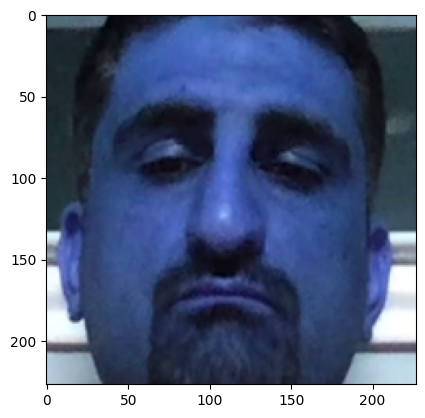

In [38]:
#displaying drowsy img
img=cv2.imread("/content/drive/MyDrive/Dataset for DDD/Drowsy/A0857.png")
plt.imshow(img)

In [14]:
print(img.shape)


(227, 227, 3)


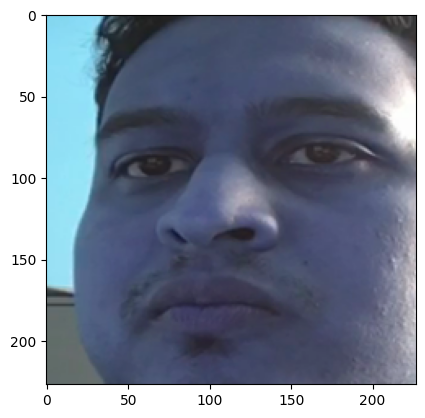

In [37]:
#displaying non drowsy img
img=cv2.imread("/content/drive/MyDrive/Dataset for DDD/Non Drowsy/b0083.png")
plt.imshow(img)

In [16]:
#create labels
encoder=OneHotEncoder()
encoder.fit([[0],[1]])

OneHotEncoder()

In [17]:
#image preprocessing
#data creation of drowsy
data=[]
paths=[]
result=[]
for r,d,f in os.walk("/content/drive/MyDrive/Dataset for DDD/Drowsy"):
  for file in f:
    if ".png" in file:
      paths.append(os.path.join(r,file))
for path in paths:
  img=Image.open(path)
  img=img.resize((128,128))
  img=np.array(img)
  if(img.shape==(128,128,3)):
    data.append(np.array(img))
    result.append(encoder.transform([[0]]).toarray())

In [18]:
#data creation of non drowsy
paths=[]
for r,d,f in os.walk("/content/drive/MyDrive/Dataset for DDD/Non Drowsy"):
  for file in f:
    if ".png" in file:
      paths.append(os.path.join(r,file))
for path in paths:
  img=Image.open(path)
  img=img.resize((128,128))
  img=np.array(img)
  if(img.shape==(128,128,3)):
    data.append(np.array(img))
    result.append(encoder.transform([[1]]).toarray())

In [19]:
data=np.array(data)
print(data.shape)

(645, 128, 128, 3)


In [21]:
result=np.array(result)
result=result.reshape(645,2)

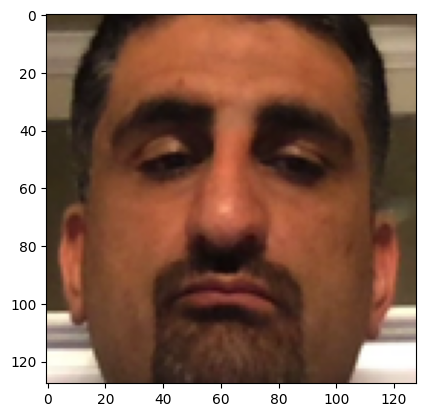

In [22]:
plt.imshow(data[6])

In [23]:
#train test split
xtrain,xtest,ytrain,ytest=train_test_split(data,result,test_size=0.20,shuffle=True,random_state=0)

In [24]:
print(xtrain.shape)

(516, 128, 128, 3)


In [25]:
print(ytrain.shape)

(516, 2)


In [26]:
#building the CNN model
model=Sequential()
model.add(Conv2D(32,kernel_size=(2,2),input_shape=(128,128,3),padding="Same"))
model.add(Conv2D(32,kernel_size=(2,2),activation="relu",padding="Same"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(64,kernel_size=(2,2),activation="relu",padding="Same"))
model.add(Conv2D(64,kernel_size=(2,2),activation="relu",padding="Same"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(64,kernel_size=(2,2),activation="relu",padding="Same"))
model.add(Conv2D(64,kernel_size=(2,2),activation="relu",padding="Same"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(2,activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      416       
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      4128      
                                                                 
 batch_normalization (Batch  (None, 128, 128, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 64, 64, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 64, 64, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 64)        8

In [27]:
#compile the neural network
model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])

In [28]:
#training the neural network
history=model.fit(xtrain,ytrain,epochs=10,batch_size=64,verbose=1,validation_data=(xtest,ytest))

Epoch 1/10
9/9 [==============================] - 46s 4s/step - loss: 2.8303 - accuracy: 0.8198 - val_loss: 0.7891 - val_accuracy: 0.7907
Epoch 2/10
9/9 [==============================] - 33s 4s/step - loss: 0.1991 - accuracy: 0.9574 - val_loss: 0.9681 - val_accuracy: 0.6512
Epoch 3/10
9/9 [==============================] - 36s 4s/step - loss: 0.1193 - accuracy: 0.9690 - val_loss: 1.0926 - val_accuracy: 0.6279
Epoch 4/10
9/9 [==============================] - 34s 4s/step - loss: 0.0958 - accuracy: 0.9709 - val_loss: 0.6186 - val_accuracy: 0.8450
Epoch 5/10
9/9 [==============================] - 37s 4s/step - loss: 0.0481 - accuracy: 0.9903 - val_loss: 0.5990 - val_accuracy: 0.8217
Epoch 6/10
9/9 [==============================] - 34s 4s/step - loss: 0.0333 - accuracy: 0.9942 - val_loss: 0.3711 - val_accuracy: 0.8217
Epoch 7/10
9/9 [==============================] - 33s 4s/step - loss: 0.0178 - accuracy: 0.9942 - val_loss: 0.3090 - val_accuracy: 0.8837
Epoch 8/10
9/9 [==================

In [29]:
#model evaluation
loss,accuracy=model.evaluate(xtest,ytest,batch_size=64)
print("Test accuracy=",accuracy)

3/3 [==============================] - 2s 475ms/step - loss: 0.2590 - accuracy: 0.9147
Test accuracy= 0.9147287011146545


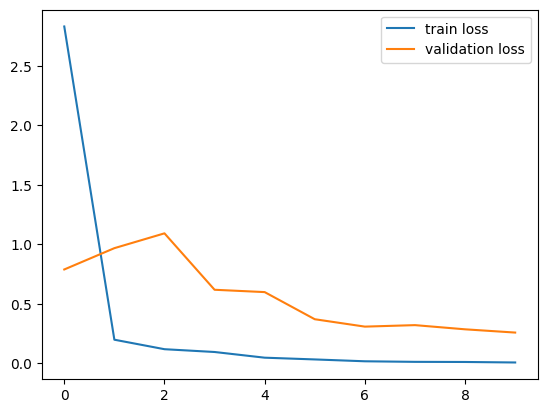

In [30]:
#plot loss value
plt.plot(history.history["loss"],label="train loss")
plt.plot(history.history["val_loss"],label="validation loss")
plt.legend()
plt.show()

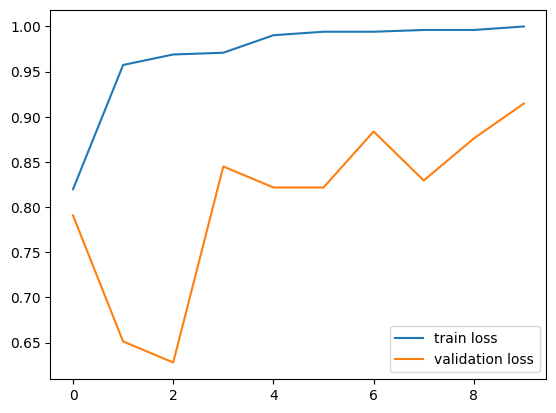

In [31]:
#plot acuuracy value
plt.plot(history.history["accuracy"],label="train loss")
plt.plot(history.history["val_accuracy"],label="validation loss")
plt.legend()
plt.show()

In [32]:
#Testing
def drowsy_detection(num):
  if num==0:
    return "person is drowsy "
  else:
    return "person is not drowsy"


The person is drowsy 


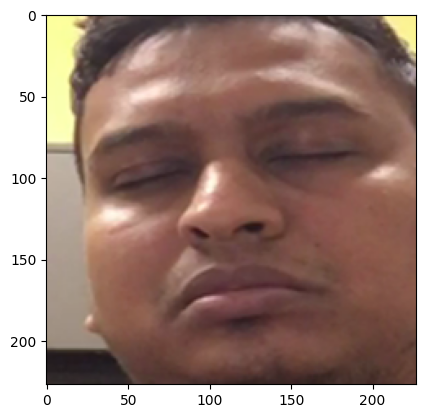

In [39]:
img=Image.open("/content/drive/MyDrive/Dataset for DDD/Drowsy/B0115.png")
h=np.array(img.resize((128,128)))
h=h.reshape(1,128,128,3)
res=model.predict_on_batch(h)
classification=np.where(res==np.amax(res))[1][0]
plt.imshow(img)
print("The "+drowsy_detection(classification))

The person is not drowsy


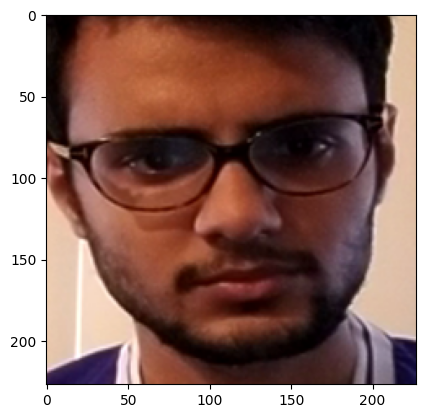

In [36]:
img=Image.open("/content/drive/MyDrive/Dataset for DDD/Non Drowsy/y1142.png")
h=np.array(img.resize((128,128)))
h=h.reshape(1,128,128,3)
res=model.predict_on_batch(h)
classification=np.where(res==np.amax(res))[1][0]
plt.imshow(img)
print("The "+drowsy_detection(classification))